In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt,cm
from matplotlib.gridspec import GridSpec as gs
import pickle as pk
from scipy.stats import mannwhitneyu

#### Load cytological profiling data prepared by Jane Liu (2021-12-21)

In [9]:
merged_df = pd.read_csv('/Volumes/LaCie/Jane_data/20211221_JL_mtb_variant_pulse_chase/merged.csv')
cond1 = merged_df['Time']=='24 hours'
cond2 = merged_df['Strain']=='WT'
cond3 = merged_df['Strain']=='whiB2'
cond4 = merged_df['Replicate']==2

# remove morphological outliers
cond5 = (merged_df['width_median']<=0.7)&(merged_df['width_median']>=0.5)
cond6 = merged_df['length']<=5

In [10]:
# note that the figure will look slightly different from the paper figure as I forgot to 
# specify random state when I generated the original figure....

df_1 = merged_df[cond1&cond2&cond4&cond5&cond6].copy().sample(500,random_state=42)
df_2 = merged_df[cond1&cond3&cond4&cond5&cond6].copy().sample(500,random_state=42)
subset = pd.concat([df_1,df_2]).reset_index(drop=True)

#### Data dumped to deposit folder

In [11]:
subset.to_csv('/Users/jz-rolling/Desktop/OMEGA_GUI/notebooks/QY_Rv1830/Github_deposit/2_Microscopy_analysis/whiB2_variants_morphological_analysis/2021-12-21_Jane_Liu_whiB2_cyto_filtered.csv')

#### Graphing

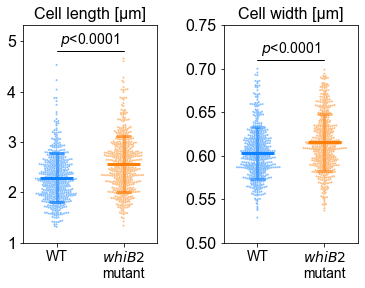

In [12]:
whib2_color = np.array([253,127,8])/255
wt_color = np.array([14,129,255])/255
color_list = [wt_color,whib2_color]
sns.set_palette(np.array([wt_color,whib2_color]))
fig=plt.figure(figsize=(6,4))
grids = gs(1,2,wspace=0.5)
ax1 = fig.add_subplot(grids[:,0])
ax2 = fig.add_subplot(grids[:,1])
sns.swarmplot(data=subset,x='Strain',y='length',ax=ax1,
            order=['WT','whiB2'],s=2,alpha=0.5)
sns.swarmplot(data=subset,x='Strain',y='width_median',ax=ax2,
            order=['WT','whiB2'],s=2,alpha=0.5)
for i,strain in enumerate(['WT','whiB2']):
    strain_data = subset[subset['Strain']==strain]
    lengths = strain_data['length']
    widths = strain_data['width_median']
    ax1.vlines(x=i,
               ymin=lengths.mean()-lengths.std(),
               ymax=lengths.mean()+lengths.std(),color=color_list[i],alpha=0.5,lw=3)
    ax2.vlines(x=i,
               ymin=widths.mean()-widths.std(),
               ymax=widths.mean()+widths.std(),color=color_list[i],alpha=0.5,lw=3)
    
    ax1.hlines(y=lengths.mean(),
               xmin=i-0.25,
               xmax=i+0.25,color=color_list[i],alpha=1,lw=3)
    ax2.hlines(y=widths.mean(),
               xmin=i-0.25,
               xmax=i+0.25,color=color_list[i],alpha=1,lw=3)
    ax1.hlines(y=lengths.mean()-lengths.std(),
               xmin=i-0.1,
               xmax=i+0.1,color=color_list[i],alpha=0.7,lw=3,capstyle='round')
    ax1.hlines(y=lengths.mean()+lengths.std(),
               xmin=i-0.1,
               xmax=i+0.1,color=color_list[i],alpha=0.7,lw=3,capstyle='round')
    ax2.hlines(y=widths.mean()-widths.std(),
               xmin=i-0.1,
               xmax=i+0.1,color=color_list[i],alpha=0.5,lw=3,capstyle='round')
    ax2.hlines(y=widths.mean()+widths.std(),
               xmin=i-0.1,
               xmax=i+0.1,color=color_list[i],alpha=0.5,lw=3,capstyle='round')

ax1.set_ylim(1,5.32)
ax2.set_ylim(0.5,0.75)
ax1.hlines(y=4.8,xmin=0,xmax=1,color='black',lw=1,capstyle='round')
ax2.hlines(y=0.71,xmin=0,xmax=1,color='black',lw=1,capstyle='round')
ax1.text(x=0.5,y=4.85,s='$p$<0.0001',fontname='Arial',fontsize=14,ha='center',va='bottom')
ax2.text(x=0.5,y=0.712,s='$p$<0.0001',fontname='Arial',fontsize=14,ha='center',va='bottom')
ax1.set_xticklabels(['WT','$whiB2$\nmutant'],fontname='Arial',fontsize=14,ha='center',va='top')
ax2.set_xticklabels(['WT','$whiB2$\nmutant'],fontname='Arial',fontsize=14,ha='center',va='top')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax1.set_ylabel('')
ax2.set_ylabel('')
ax1.set_yticks([1,2,3,4,5])
ax1.set_yticklabels([1,2,3,4,5],fontname='Arial',fontsize=16)
ax2.set_yticks([0.5,0.55,0.6,0.65,0.7,0.75])
ax2.set_yticklabels(['0.50','0.55','0.60','0.65','0.70','0.75'],fontname='Arial',fontsize=16)
ax1.set_title('Cell length [μm]',fontname='Arial',fontsize=16)
ax2.set_title('Cell width [μm]',fontname='Arial',fontsize=16)
plt.savefig('/Users/jz-rolling/Desktop/Rv1830_manuscript/figures/whiB2_mutant_length_width.png',
           bbox_inches='tight',dpi=160)